#### Note:

This notebook contains all the graphs and statistical analysis that I made to justify my Featuring Engineering Ideas, feel free to go to the last section (4 Conclusion) to read a summary of this notebook.

In [1]:
import sys
sys.path.append("../src/")
import my_functions

import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

## 1.Exploratory Data Analysis

In [2]:
train_data = "../data/raw/train.csv"
validation_data = "../data/raw/val.csv"

# Set data types (PassengerId as string because of index duplicates and Survived as int to calculate probabilities)
dtype = {"PassengerId":"object", "Survived":"int", "Pclass":"category", "Sex":"category", "Embarked":"category"} 

# Read Data
data_train = pd.read_csv(train_data, sep=";", dtype=dtype)
data_val = pd.read_csv(validation_data, sep=";", dtype=dtype)

# Create Index (Not duplicated)
data_train["PassengerId"] = data_train["PassengerId"] + "-training" 
data_val["PassengerId"] = data_val["PassengerId"] + "-validation"

data_train.set_index("PassengerId", inplace = True)
data_val.set_index("PassengerId", inplace = True)

# Create a dataset with all data
data_whole = data_train.append(data_val)

### 1.1 Target Distribution

Text(0.5, 1.0, 'Validation')

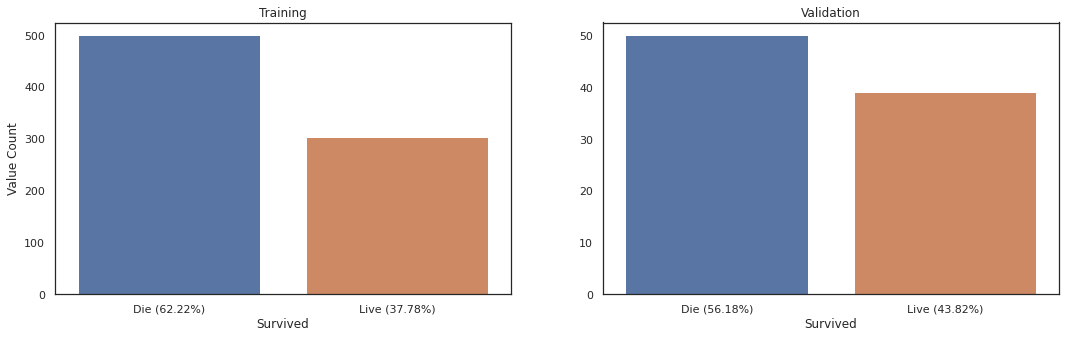

In [3]:
plt.rcParams['figure.figsize'] = [18, 5]

# Obtain Percentages
die_train = data_train['Survived'].value_counts()[0] / data_train.shape[0] * 100
live_train = data_train['Survived'].value_counts()[1] / data_train.shape[0] * 100

die_val = data_val['Survived'].value_counts()[0] / data_val.shape[0] * 100
live_val = data_val['Survived'].value_counts()[1] / data_val.shape[0] * 100

# Plot Training
plt.subplot(1,2,1)
sns.countplot(data_train['Survived'])
plt.xticks((0, 1), ['Die ({0:.2f}%)'.format(die_train), 'Live ({0:.2f}%)'.format(live_train)])
plt.ylabel('Value Count')
plt.title("Training")

# Plot Validation
plt.subplot(1,2,2)
sns.countplot(data_val['Survived'])
plt.xticks((0, 1), ['Die ({0:.2f}%)'.format(die_val), 'Live ({0:.2f}%)'.format(live_val)])
plt.ylabel('')
plt.title("Validation")

#### Findings target distribution

<ul>
<li>The data is imbalance that is why we can not rely on accuracy as an optimizing metric. </li>
<li>The data is more imbalance in the training set</li>
</ul>

### 1.2 Pairplot

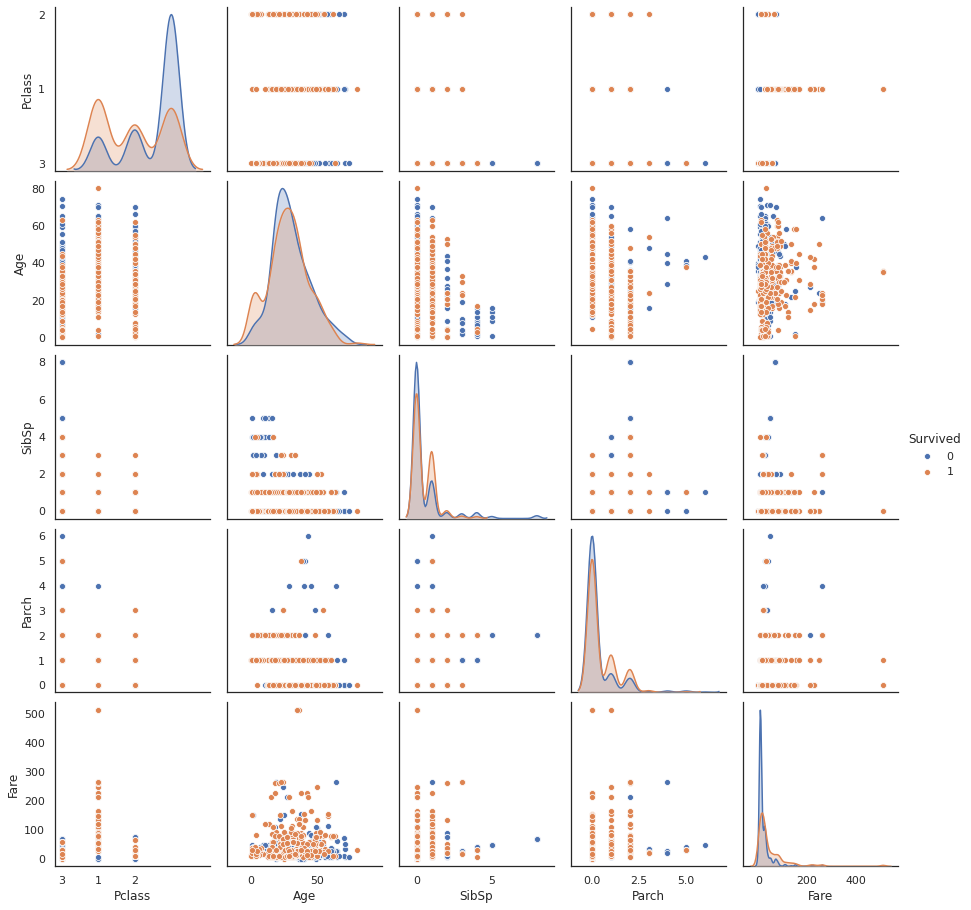

In [4]:
sns.pairplot(data_whole, hue="Survived") 

#### Findings  pair plots

#### Pclass
1. Pclass is a key predictor, because it has a great separation in the density plot.
2. People of the third class tend to have larger families.
3. There are people from first class who paid low fares.

#### Age
1. People from all ages survived and die (We need to see density plot)
2. The majority of people in the titanic has less than 50 years.

#### Sibsp
1. The majority of people in the titanic does not have a Sibling or Spouse or just 1.

#### Fare
1. The majority of people in the titanic paid less than 200 dolars
2. The majority of people who paid a low fare did not survive (Density Plot Fare:Fare)

<ul>
<li>In general there are not significant outliers</li>
</ul>



### 1.3 Correlations

Text(0.5, 1.0, 'Validation')

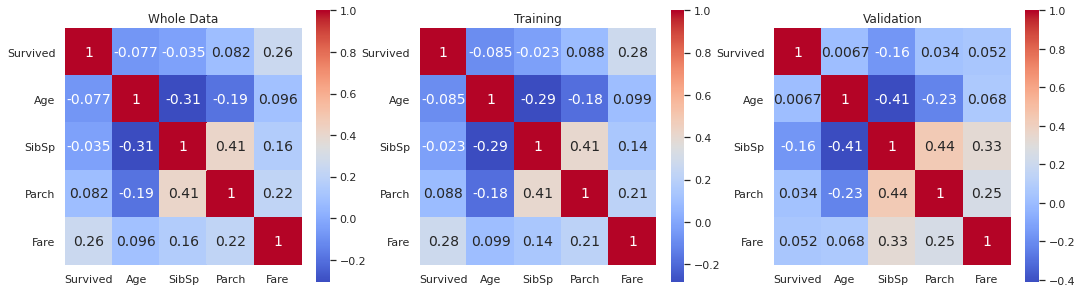

In [5]:
# Whole Data
plt.subplot(1,3,1)
sns.heatmap(data_whole.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
plt.title("Whole Data")
# Training
plt.subplot(1,3,2)
sns.heatmap(data_train.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
plt.title("Training")
# Validation 
plt.subplot(1,3,3)
sns.heatmap(data_val.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
plt.title("Validation")

#### Findings correlation plots
1. The only different correlation between splits is SibSp:Fare in Validation set. I do not generate a new random split, because maybe the current split is set to grading purposes.
2. There is no strong correlation in the whole dataset >0.8. Maybe SibSp and Parch can coverge into one variable to avoid curse of dimensionality

### 1.4 Missing Data

Text(0.5, 1.0, 'NA Values')

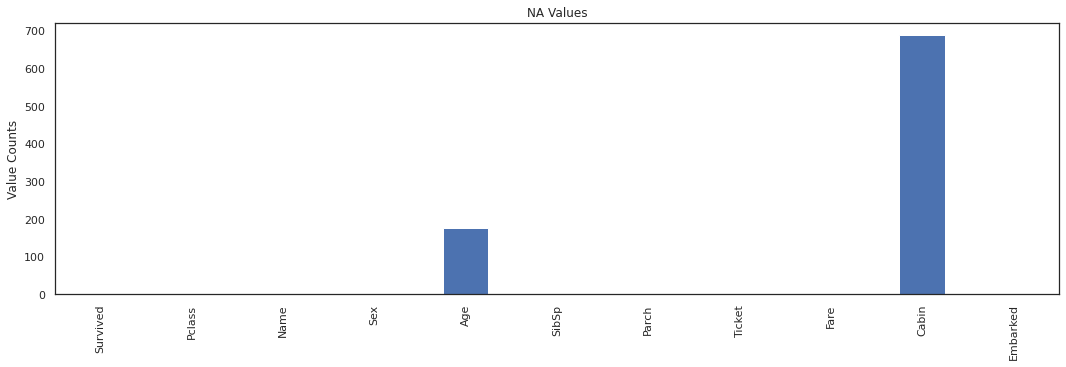

In [6]:
data_whole.isna().sum().plot.bar()
plt.ylabel("Value Counts")
plt.title("NA Values")

In [7]:
data_whole.groupby(['Pclass', 'Sex']).median()['Age']

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

#### Findings NA values

1. The majority of NA values are in the cabin column.
2. Also age has a considerable amount of missing values.

#### Filling NA values

1. For cabin is better to drop the whole column, because it has many NA values.
2. For age, there is not a strong correlation with any variable (As seen in correlation plot). However, I think it makes sense to take the median age of Pclass, Sex to fill those missing values. 

### 1.5 Categorical Data

Text(0.5, 1.0, 'Port of Embarcation')

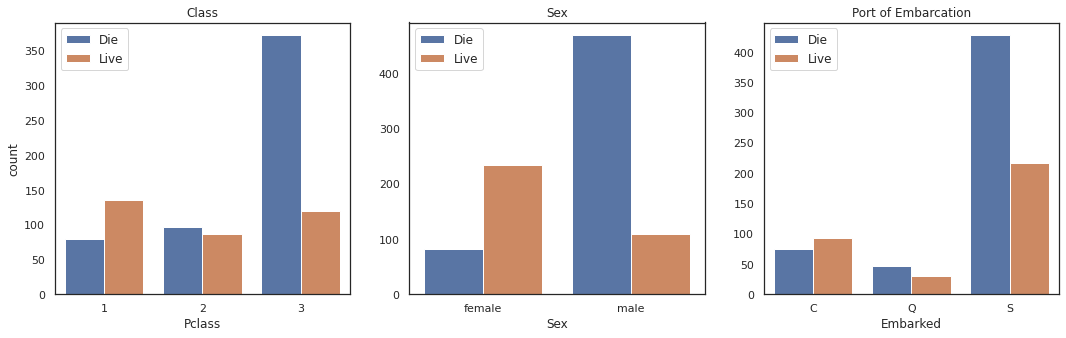

In [8]:
#Categorical Data

# Pclass
plt.subplot(1,3,1)
sns.countplot(x='Pclass', data=data_whole, hue="Survived")
plt.legend(['Die', 'Live'], loc='upper left', prop={'size': 12})
plt.title("Class")
# Sex
plt.subplot(1,3,2)
sns.countplot(x='Sex', data=data_whole, hue="Survived")
plt.legend(['Die', 'Live'], loc='upper left', prop={'size': 12})
plt.ylabel("")
plt.title("Sex")
# Port of Embarcation
plt.subplot(1,3,3)
sns.countplot(x='Embarked', data=data_whole, hue="Survived")
plt.legend(['Die', 'Live'], loc='upper left', prop={'size': 12})
plt.ylabel("")
plt.title("Port of Embarcation")

Text(0.5, 1.0, 'Pclass vs Survived')

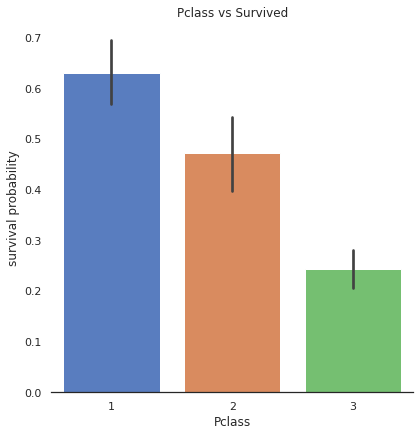

In [9]:
# Pclass
g = sns.factorplot(x="Pclass", y="Survived",  data=data_whole, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.title("Pclass vs Survived")

Text(0.5, 1.0, 'Sex vs Survived')

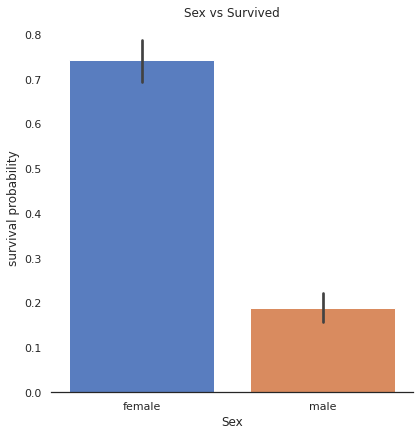

In [10]:
# Sex 
g = sns.factorplot(x="Sex", y="Survived",  data=data_whole, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.title("Sex vs Survived")

Text(0.5, 1.0, 'Embarked vs Survived')

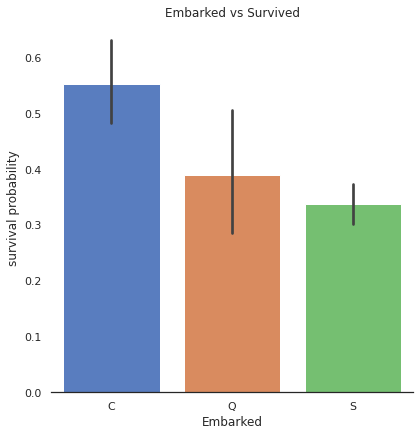

In [11]:
# Embarked 
g = sns.factorplot(x="Embarked", y="Survived",  data=data_whole, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
plt.title("Embarked vs Survived")

#### Findings Categorical Data

1. The majority of people in third class did not survive (Pclass is a good predictive variable)
2. The majority of males did not survive (Sex is a good predictive variable)
3. The majorit of people in port s did not survive.

### 1.6 Continuos Data

#### 1.6.1 Density Plots

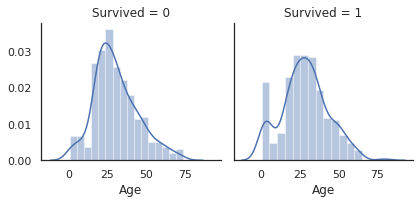

In [12]:
# Age
g = sns.FacetGrid(data_whole, col='Survived')
g = g.map(sns.distplot, "Age")

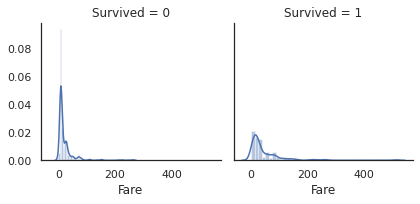

In [13]:
# Fare
g = sns.FacetGrid(data_whole, col='Survived')
g = g.map(sns.distplot, "Fare")

#### 1.6.1 Outliers

Text(0.5, 1.0, 'Fare')

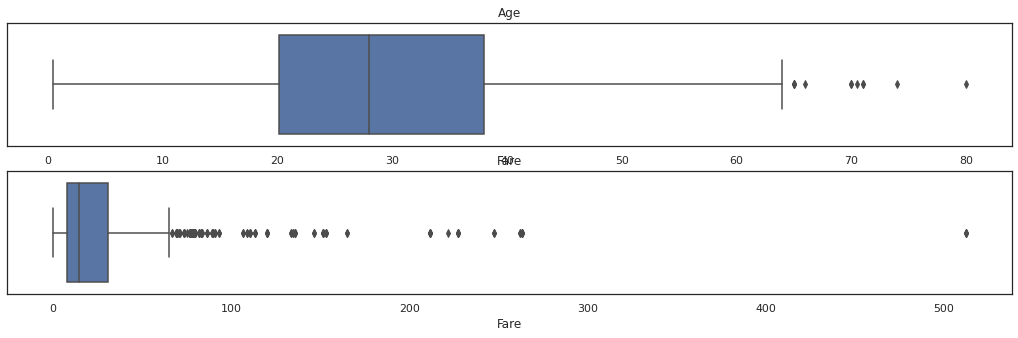

In [14]:
# Age
plt.subplot(2,1,1)
sns.boxplot(data_whole["Age"])
plt.title("Age")

# Fare
plt.subplot(2,1,2)
sns.boxplot(data_whole["Fare"])
plt.title("Fare")

#### Findings Continuos  Data

1. The age distribution looks gaussian. 
2. The age distribution is different from people who died and people who lives (The people who did not survive are younger).
3. In age there are not outliers (As stated in pairplot, the majority of people is less than 60 years old).
4. Maybe the fare of 500 is an outlier.

## 2 Preprocess

### 2.1 Drop Cabin Column

Because it has 687 missing values

In [15]:
data_whole.drop(["Cabin"], axis = 1, inplace=True) 

## 3 Feature Engineering

### 3.1 Name variable

We can extract the title from the name column:

In [16]:
data_whole['Title'] = data_whole['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0] # Extracts Title from Name column

Text(0.5, 1.0, 'Distribution Titles')

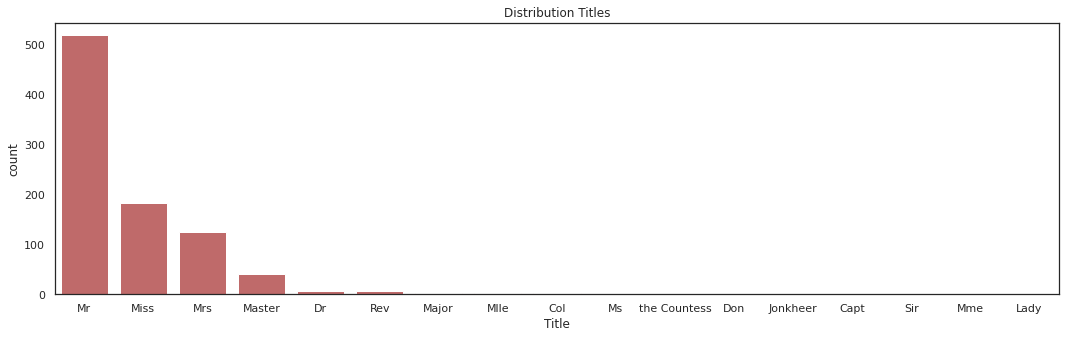

In [17]:
order = list(pd.DataFrame(data_whole["Title"].value_counts()).reset_index()["index"]) # Obtains an ordered list of the titles 
sns.countplot(x='Title', data=data_whole, order=order, color='indianred')
plt.title("Distribution Titles")

Mrs signifies that she is married so I am going to create the new variable is married

In [18]:
data_whole['Is_Married'] = data_whole["Title"].apply(lambda x: 1 if x == 'Mrs' else 0) # Based on title check if someone is married

There are some titles that have the same meaning. So we are going to group them as follows:

1. Military/Politician/Clergy = Dr, Col, Major, Jonkheer, Capt, Sir, Don , Rev. 
2. Miss = Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona.
3. Master remains the same, because it is a title of people under 26.
4. Mr remains Mr.

Grouping them will make it easier for the model to use it as predictive variable

In [19]:
# Group titles in categories

data_whole['Title'] = data_whole['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Military/Politician/Clergy')
data_whole['Title'] = data_whole['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss')
data_whole["Title"] = data_whole["Title"].astype("category")

Text(0.5, 1.0, 'Distribution Titles')

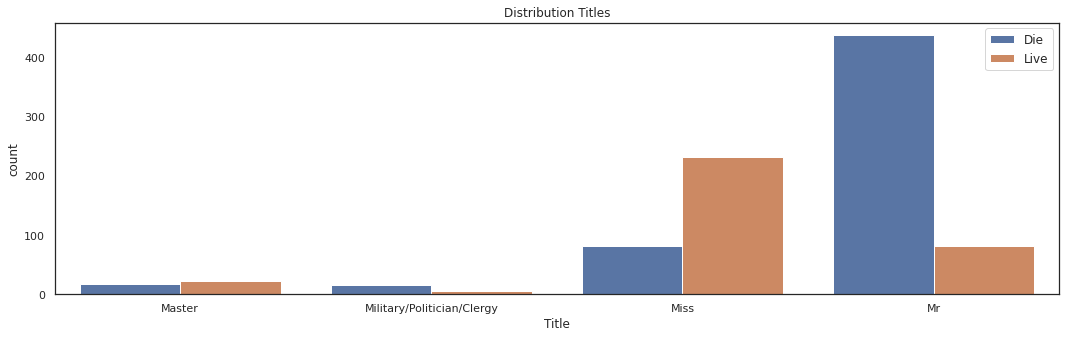

In [20]:
sns.countplot(x='Title', data=data_whole, hue="Survived")
plt.legend(['Die', 'Live'], loc='upper right', prop={'size': 12})
plt.title("Distribution Titles")

The principal category that determines if someone survives or not is in Mr and Miss (The majority of data is there). That's why this new variable does not give a lot of hope, because maybe is going to give me the same value as the column Sex (Female/Male)

In [21]:
data_whole.drop(["Name"], axis = 1, inplace=True) # Drop Name Column 

### 3.2 Age

As stated above we are going to fill the 177 NA values of age with the median age of Pclass, Sex

In [22]:
data_whole['Age'] = data_whole.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

### 3.3 Family Size

A reasonable hipotesis is that larger families will have a hard time evacuating, they have to look for their children, spouses, brotherst etc. That is why I created the Family Size variable

In [23]:
data_whole["Fsize"] = data_whole["SibSp"] + data_whole["Parch"] + 1 # Family size descriptor from SibSp and Parch and this is going to be as a category

Text(0.5, 1.0, 'Survival Probability by Family Size')

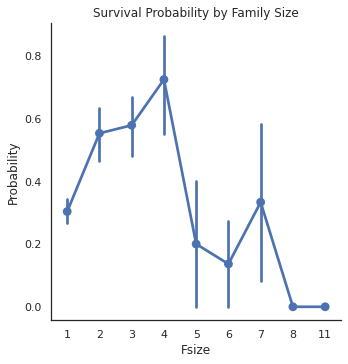

In [24]:
sns.factorplot(x="Fsize", y="Survived", data=data_whole)
plt.ylabel("Probability")
plt.title("Survival Probability by Family Size")

We can see that there are different probabilities depending the Family Size, so this variable is maybe a good predictor. That is also why we are going to create a new categorical column base on family size.

In [25]:
data_whole["TypeF"] = data_whole["Fsize"].apply(lambda fsize: my_functions.map_fsize(fsize))

Text(0.5, 1.0, 'Survival Probability by Family Type')

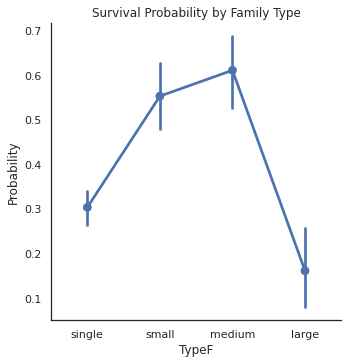

In [26]:
sns.factorplot(x="TypeF", y="Survived", data=data_whole)
plt.ylabel("Probability")
plt.title("Survival Probability by Family Type")

We can see that the family type is going to be a good predictor, because it has a high impact in survival probability

### 3.4 Ticket

In [27]:
data_whole["Ticket"] = my_functions.extract_ticket_prefix(data_whole["Ticket"])
data_whole["Ticket"] = data_whole["Ticket"].astype("category")

In [28]:
data_whole["Ticket"].value_counts()

X          661
PC          60
CA          41
A5          21
SOTONOQ     15
STONO       12
WC          10
SCPARIS      7
A4           7
SOC          6
STONO2       6
C            5
FCC          5
SCParis      4
LINE         4
SOPP         3
PP           3
SCAH         3
WEP          3
PPP          2
SOTONO2      2
SWPP         2
SC           1
SOP          1
SCA4         1
Fa           1
FC           1
CASOTON      1
SCOW         1
AS           1
SP           1
Name: Ticket, dtype: int64

The majority of values in tickets are X, so maybe this is not a promising variable. But let's try it out

In [29]:
values_not_X = data_whole[ data_whole["Ticket"] != "X"].value_counts().sum() # Number of values that are not X
values_X = data_whole[ data_whole["Ticket"] == "X"].value_counts().sum() # Number of values that are X

print("The number of values that are not X is : ", str(values_not_X))
print("The number of values that are X is : ", str(values_X))

The number of values that are not X is :  230
The number of values that are X is :  659


### 3.5 Format the DataFrame

In [30]:
# Change data types
data_whole["Survived"] = data_whole["Survived"].astype("bool")
data_whole["Is_Married"] = data_whole["Is_Married"].astype("bool")
data_whole["TypeF"] = data_whole["TypeF"].astype("category")

#### 3.5.1 Resting NA Values

In [31]:
data_whole.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Title         0
Is_Married    0
Fsize         0
TypeF         0
dtype: int64

Because there are only 2 NA values I am going to drop them

In [32]:
data_whole.dropna(inplace=True)

## 4 Conclusions

#### 4.1 Final Conclusions

##### New Variables
1. Is_Married: Boolean saying if someone is married or not (If Mrs in the name is married)

2. Title: Title extracted from the name column. It is also group as follows:

    <ul>
    <li>Military/Politician/Clergy = Dr, Col, Major, Jonkheer, Capt, Sir, Don , Rev. </li>
    <li>Miss = Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona.</li>
    <li>Master remains the same, because it is a title of people under 26.</li>
    <li>Mr remains Mr.</li>
    </ul>

3. Fsize: SibSp + Parch + 1 (Size of the family)

4. TypeF: Category based on family size (Fsize). It can be single, small, medium, large. 

5. Ticket: Category based on Ticket index.

##### Filling NA's
1. Cabin(>600): Drop the whole Cabin column, because it has more than 600 of NA's.

2. Age(>150): Educated guess of a median age of groupby of Sex and Pclass.

3. Embarked(2): Drop NA's.

##### Notes:
- I decided not to format SibSp, Parch, and Fsize as a category because TypeF captures this type of data. But maybe it futures iterations will be worth to format it as a category.

- The data frame is going to be normalized when fitting the model, to speed learning

- Maybe later is good to change Sex column to boolean, instead of category

- All of these steps are in the function build_features_raul() in my_functions package, submodule build_features.

#### 4.2 DataFrame before Dummies

In [33]:
data_whole.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Is_Married,Fsize,TypeF
PassengerId,,,,,,,,,,,,,
1-training,False,3,male,24.0,0,0,X,8.05,S,Mr,False,1,single
2-training,False,3,male,29.0,0,0,X,8.05,S,Mr,False,1,single


In [34]:
data_whole.dtypes

Survived          bool
Pclass        category
Sex           category
Age            float64
SibSp            int64
Parch            int64
Ticket        category
Fare           float64
Embarked      category
Title         category
Is_Married        bool
Fsize            int64
TypeF         category
dtype: object

#### 4.3 DataFrame after Dummies

In [35]:
data_whole = pd.get_dummies(data_whole) 

In [36]:
data_whole.head(2)

,Survived,Age,SibSp,Parch,Fare,Is_Married,Fsize,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Title_Master,Title_Military/Politician/Clergy,Title_Miss,Title_Mr,TypeF_large,TypeF_medium,TypeF_single,TypeF_small
PassengerId,,,,,,,,,,,,,,,,,,,,,
1-training,False,24.0,0,0,8.05,False,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2-training,False,29.0,0,0,8.05,False,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [37]:
data_whole.dtypes

Survived                               bool
Age                                 float64
SibSp                                 int64
Parch                                 int64
Fare                                float64
Is_Married                             bool
Fsize                                 int64
Pclass_1                              uint8
Pclass_2                              uint8
Pclass_3                              uint8
Sex_female                            uint8
Sex_male                              uint8
Ticket_A4                             uint8
Ticket_A5                             uint8
Ticket_AS                             uint8
Ticket_C                              uint8
Ticket_CA                             uint8
Ticket_CASOTON                        uint8
Ticket_FC                             uint8
Ticket_FCC                            uint8
Ticket_Fa                             uint8
Ticket_LINE                           uint8
Ticket_PC                       